# Simple linear regression

## Import the relevant libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn
# We can override the default matplotlib styles with those of Seaborn
import seaborn as sns
sns.set()

## Load the data

In [3]:
# Load the data from a .csv in the same folder
data = pd.read_csv('1.01. Simple linear regression.csv')

In [4]:
# Let's check what's inside this data frame
data

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [5]:
# This method gives us very nice descriptive statistics. We don't need this as of now, but will later on!
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
SAT    84 non-null int64
GPA    84 non-null float64
dtypes: float64(1), int64(1)
memory usage: 1.4 KB


In [7]:
data.columns

Index(['SAT', 'GPA'], dtype='object')

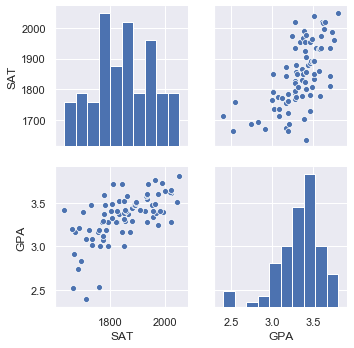

In [8]:
sns.pairplot(data)

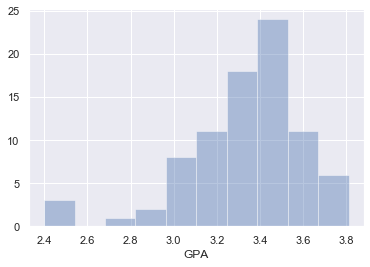

In [9]:
sns.distplot(data['GPA'],kde=False)

In [10]:
data.corr()
# sns.heatmap(data.corr(),annot=True)

,SAT,GPA
SAT,1.000000,0.637184
GPA,0.637184,1.000000


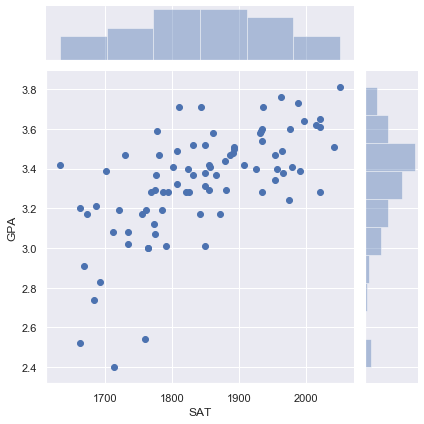

In [11]:
sns.jointplot('SAT','GPA',data)

# Create your first regression

## Split the data to feature and Lables

In [12]:
# Following the regression equation, our dependent variable (y) is the GPA
y = data ['GPA']
# Similarly, our independent variable (x) is the SAT score
x1 = data ['SAT']

## Explore the data

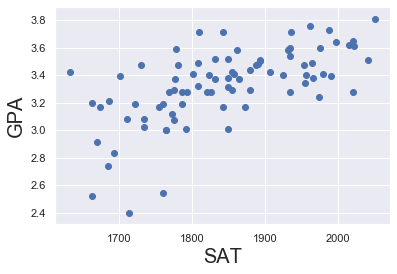

In [13]:
# Plot a scatter plot (first we put the horizontal axis, then the vertical axis)
plt.scatter(x1,y)
# Name the axes
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
# Show the plot
plt.show()



## Regression itself

In [14]:
# Add a constant. Essentially, we are adding a new column (equal in lenght to x), which consists only of 1s
x = sm.add_constant(x1)
# Fit the model, according to the OLS (ordinary least squares) method with a dependent variable y and an idependent x
results = sm.OLS(y,x).fit()
# Print a nice summary of the regression. That's one of the strong points of statsmodels -> the summaries
results.summary()

C:\Users\amin1\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Sun, 12 Apr 2020   Prob (F-statistic):           7.20e-11
Time:                        15:50:04   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

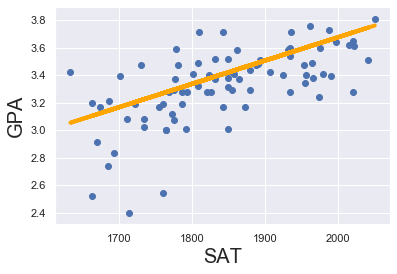

In [15]:
# Create a scatter plot
plt.scatter(x1,y)
# Define the regression equation, so we can plot it later
yhat = 0.0017*x1 + 0.275*1
# Plot the regression line against the independent variable (SAT)
fig = plt.plot(x1,yhat, lw=4, c='orange', label ='regression line')

# Label the axes
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

# Using Sklearn

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X=data['SAT']
y=data['GPA']

In [18]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

In [19]:
X_train

74    2021
58    1781
20    1761
16    1755
40    1865
      ... 
49    1979
29    1794
11    1775
5     1670
67    1934
Name: SAT, Length: 67, dtype: int64

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lm = LinearRegression()
###############################
X_train=pd.Series(X_train).array
y_train=pd.Series(y_train).array
X_test=pd.Series(X_test).array
y_test=pd.Series(y_test).array

X_train=X_train.to_numpy()
y_train=y_train.to_numpy()
X_test=X_test.to_numpy()
y_test=y_test.to_numpy()

X_train=X_train.reshape(-1, 1)
y_train=y_train.reshape(-1, 1)
X_test=X_test.reshape(-1, 1)
y_test=y_test.reshape(-1, 1)
#########################
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
print(lm.intercept_)

[0.4858209]


In [32]:
print(lm.coef_)

[[0.00154671]]


In [33]:
X_test

array([[1685],
       [1714],
       [2041],
       [1893],
       [1712],
       [1702],
       [1674],
       [1764],
       [1887],
       [1893],
       [1872],
       [1850],
       [1933],
       [1773],
       [1850],
       [1730],
       [1792]], dtype=int64)

In [34]:
predictions = lm.predict(X_test)

In [35]:
predictions

array([[3.09202512],
       [3.13687967],
       [3.64265343],
       [3.41374053],
       [3.13378625],
       [3.11831917],
       [3.07501132],
       [3.21421511],
       [3.40446028],
       [3.41374053],
       [3.38125965],
       [3.34723206],
       [3.47560888],
       [3.22813549],
       [3.34723206],
       [3.16162701],
       [3.25752295]])

In [36]:
lm.predict([[100000000000]])

array([[1.54670874e+08]])

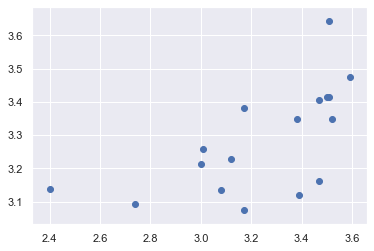

In [37]:
plt.scatter(y_test,predictions)

In [43]:
s=y_test-predictions
s.mean()

-0.04784997085316799

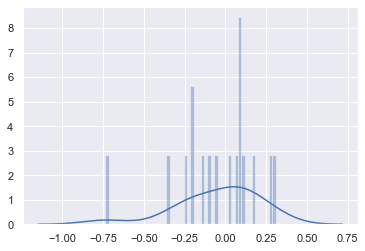

In [42]:
sns.distplot((y_test-predictions),bins=50);

In [55]:
from sklearn import metrics

In [61]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


MAE: 0.1342856511659432
MSE: 0.0395111256134254
RMSE: 0.19877405669107173


In [45]:
X_test

array([[1685],
       [1714],
       [2041],
       [1893],
       [1712],
       [1702],
       [1674],
       [1764],
       [1887],
       [1893],
       [1872],
       [1850],
       [1933],
       [1773],
       [1850],
       [1730],
       [1792]], dtype=int64)

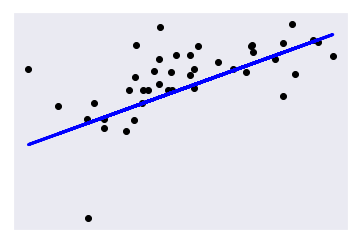

In [78]:
# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, predictions, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [44]:
metrics.

<bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>